In [187]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [188]:
data_train=pd.read_csv('train_file.csv')
traindata_copy=data_raw.copy()

data_test=pd.read_csv('test_file.csv')
testdata_copy=testdata_raw.copy()

1.       patient_id: Patient id.
2.       time: time in days relative to the onset of treatment, which occurs at time 0.
3.       dos: time in days from the start of the study, January 1 of the first year of the study.
4.       hatype (Target): a factor with levels Aura No Aura, the type of migraine experienced by a subject. (Encode: Aura =0, No Aura=1)
5.       age: at the onset of treatment, in years.
6.       airq: a measure of air quality.
7.       medication: a factor with levels none reduced continuing, representing subjects who discontinued their medication, who continued but at a reduced dose, or who continued at the previous dose.
8.       headache: a factor with levels no yes.
9.       sex: a factor with levels of female male.

In [189]:
data_train.head()

,patient_id,time,dos,hatype,age,airq,medication,headache,sex
0,1,-7.0,757.0,Aura,30.0,18.0,continuing,yes,female
1,2,-11.0,753.0,Aura,30.0,9.0,continuing,yes,female
2,3,-6.0,758.0,Aura,30.0,19.0,continuing,yes,female
3,4,29.0,793.0,Aura,30.0,21.0,continuing,yes,female
4,5,22.0,786.0,Aura,30.0,21.0,continuing,yes,female


In [190]:
data_test.head()

,patient_id,time,dos,age,airq,medication,headache,sex
0,1,23.0,262,54,20.0,continuing,yes,female
1,2,31.0,795,30,15.0,continuing,yes,female
2,3,28.0,792,30,22.0,continuing,no,female
3,4,26.0,790,30,12.0,continuing,yes,female
4,5,34.0,798,30,20.0,continuing,yes,female


In [191]:
data_test.isnull().sum()

patient_id     0
time           2
dos            0
age            0
airq           0
medication    10
headache       1
sex            0
dtype: int64

In [192]:
data_train.drop('patient_id',axis=1,inplace=True)
data_test.drop('patient_id',axis=1,inplace=True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000016E9CDE8C08>,
      dtype=object)

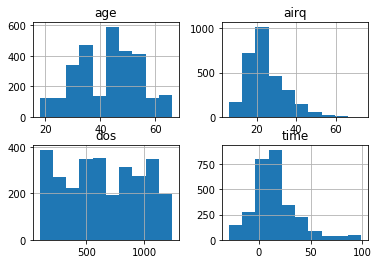

In [193]:
data_train.hist()

In [194]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906 entries, 0 to 2905
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        2899 non-null   float64
 1   dos         2901 non-null   float64
 2   hatype      2906 non-null   object 
 3   age         2898 non-null   float64
 4   airq        2905 non-null   float64
 5   medication  2890 non-null   object 
 6   headache    2905 non-null   object 
 7   sex         2906 non-null   object 
dtypes: float64(4), object(4)
memory usage: 181.8+ KB


In [195]:
data_train['medication'].fillna(data_train['medication'].mode()[0],inplace=True)
data_test['medication'].fillna(data_train['medication'].mode()[0],inplace=True)

data_train['time'].fillna(data_train['time'].median(),inplace=True)
data_test['time'].fillna(data_test['time'].median(),inplace=True)

data_train['airq'].fillna(data_train['airq'].median(),inplace=True)
data_test['airq'].fillna(data_test['airq'].median(),inplace=True)

data_train['headache'].fillna(data_train['headache'].mode()[0],inplace=True)
data_test['headache'].fillna(data_test['headache'].mode()[0],inplace=True)

In [196]:
data_train.dropna(inplace=True)

In [197]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2893 entries, 0 to 2905
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   time        2893 non-null   float64
 1   dos         2893 non-null   float64
 2   hatype      2893 non-null   object 
 3   age         2893 non-null   float64
 4   airq        2893 non-null   float64
 5   medication  2893 non-null   object 
 6   headache    2893 non-null   object 
 7   sex         2893 non-null   object 
dtypes: float64(4), object(4)
memory usage: 203.4+ KB


In [198]:
data_train.hatype.value_counts()

No Aura    1703
Aura       1190
Name: hatype, dtype: int64

In [199]:
train=pd.get_dummies(data_train,drop_first=True)

In [200]:
test=pd.get_dummies(data_test,drop_first=True)

In [201]:
train.head()

,time,dos,age,airq,hatype_No Aura,medication_none,medication_reduced,headache_yes,sex_male
0,-7.0,757.0,30.0,18.0,0,0,0,1,0
1,-11.0,753.0,30.0,9.0,0,0,0,1,0
2,-6.0,758.0,30.0,19.0,0,0,0,1,0
3,29.0,793.0,30.0,21.0,0,0,0,1,0
4,22.0,786.0,30.0,21.0,0,0,0,1,0


In [202]:
train.columns

Index(['time', 'dos', 'age', 'airq', 'hatype_No Aura', 'medication_none',
       'medication_reduced', 'headache_yes', 'sex_male'],
      dtype='object')

In [203]:
x_ohe=['time', 'dos', 'age', 'airq', 'medication_none','medication_reduced', 'headache_yes', 'sex_male']

In [204]:
y=['hatype_No Aura']

In [205]:
X_train, X_val, y_train, y_val = train_test_split(data[x_ohe], data[y], test_size=0.25 , random_state=1)

In [206]:
X_train.head()

,time,dos,age,airq,medication_none,medication_reduced,headache_yes,sex_male
2770,-18.0,1165.0,35.0,25.0,0,0,0,0
1684,7.0,1072.0,35.0,20.0,0,0,1,0
1809,39.0,803.0,48.0,40.0,0,0,0,0
1734,5.0,678.0,52.0,13.0,0,0,1,1
1802,-19.0,745.0,53.0,25.0,0,0,0,0


In [207]:
X_val.head()

,time,dos,age,airq,medication_none,medication_reduced,headache_yes,sex_male
2259,8.0,954.0,54.0,38.0,0,0,0,0
1400,2.0,612.0,46.0,25.0,1,0,1,0
1458,1.0,583.0,46.0,18.0,0,0,1,0
193,42.0,148.0,42.0,17.0,0,0,1,0
2643,-2.0,1063.0,33.0,22.0,0,0,1,0


In [208]:
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics

In [209]:
NB_model = GaussianNB()
NB_model.fit(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


GaussianNB()

In [210]:
NB_model.score(X_train, y_train)

0.6141078838174274

In [211]:
from sklearn import svm

SVM_model= svm.SVC(random_state=1)
SVM_model.fit(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


SVC(random_state=1)

In [212]:
SVM_model.score(X_train, y_train)

0.6514522821576764

In [213]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
LDA_model= LinearDiscriminantAnalysis()
LDA_model.fit(X_train, y_train)
LDA_model.score(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6090364223144306

In [214]:
from sklearn.ensemble import AdaBoostClassifier


ADB_model = AdaBoostClassifier(n_estimators=100,random_state=1)
ADB_model.fit(X_train,y_train)
ADB_model.score(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.8298755186721992

In [215]:
import xgboost as xgb
XGB_model=xgb.XGBClassifier(random_state=1,learning_rate=0.01)
XGB_model.fit(X_train, y_train)
XGB_model.score(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


0.6883356385431074

In [216]:
from sklearn.neighbors import KNeighborsClassifier

KNN_model=KNeighborsClassifier()
KNN_model.fit(X_train,y_train)
KNN_model.score(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  after removing the cwd from sys.path.


0.9294605809128631

In [217]:
predicted_rf=KNN_model.predict(X_val)

In [218]:
from sklearn import tree


DT_model= tree.DecisionTreeClassifier()
DT_model.fit(X_train, y_train)
print(DT_model.score(X_train, y_train))
print(DT_model.score(X_val, y_val))


1.0
0.9834254143646409


In [219]:
from sklearn.ensemble import RandomForestClassifier

RF_model=RandomForestClassifier(n_estimators=100,random_state=1)
RF_model.fit(X_train, y_train)
print(DT_model.score(X_train, y_train))

C:\Users\chith\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


1.0


In [220]:
predicted_rf=RF_model.predict(test[x_ohe])

In [221]:
submission=pd.read_csv('Sample_Submission.csv')

In [ ]:


submission['hatype']= predicted_rf 
submission.to_csv('Submission_one.csv',index=False) 

In [222]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
cart = DecisionTreeClassifier()
Bagging_model=BaggingClassifier(base_estimator=cart,n_estimators=200,random_state=1)
Bagging_model.fit(X_train, y_train)

C:\Users\chith\Anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


BaggingClassifier(base_estimator=DecisionTreeClassifier(), n_estimators=200,
                  random_state=1)

In [223]:
predicted_bagging=DT_model.predict(test[x_ohe])

In [ ]:
submission['hatype']= predicted_bagging 
submission.to_csv('Submission_one.csv',index=False) 